In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
from pathlib import Path
import pandas as pd
import string
import re
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pd.set_option('display.max_colwidth', -1)

<ipython-input-6-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Second year/Progetto SMA/commenti.csv")

In [ ]:
data

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr
...,...,...,...,...,...,...,...,...,...,...
14484,12062,random-wander,"Yeah, I was just there again tonight. I social...",ivdzp1o,2022-11-07 07:09:42,/r/seduction/comments/yie6kj/made_a_realizatio...,3,t1_iv8fh8x,yie6kj,random-wander
14485,12089,DeanG30,YouTube has quite a few guys in the game that ...,ive7h7w,2022-11-07 09:04:38,/r/seduction/comments/yimxhf/best_books_or_ref...,2,t3_yimxhf,yimxhf,IndicameIndica
14486,14485,DeanG30,Confidence will come with a high self-esteem w...,ive7y3u,2022-11-07 09:12:06,/r/seduction/comments/yiku3l/how_do_i_work_on_...,2,t3_yiku3l,yiku3l,sad_breadcrumbs
14487,11884,BakarGubimGlas,On point,ivehe0o,2022-11-07 11:28:42,/r/seduction/comments/yi9oxz/if_a_girl_says_we...,1,t1_iui7v7a,yi9oxz,150420throwaway


In [ ]:
data['created_utc'] = pd.to_datetime(data['created_utc']) 

In [ ]:
data.tail()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
14484,12062,random-wander,"Yeah, I was just there again tonight. I social...",ivdzp1o,2022-11-07 07:09:42,/r/seduction/comments/yie6kj/made_a_realizatio...,3,t1_iv8fh8x,yie6kj,random-wander
14485,12089,DeanG30,YouTube has quite a few guys in the game that ...,ive7h7w,2022-11-07 09:04:38,/r/seduction/comments/yimxhf/best_books_or_ref...,2,t3_yimxhf,yimxhf,IndicameIndica
14486,14485,DeanG30,Confidence will come with a high self-esteem w...,ive7y3u,2022-11-07 09:12:06,/r/seduction/comments/yiku3l/how_do_i_work_on_...,2,t3_yiku3l,yiku3l,sad_breadcrumbs
14487,11884,BakarGubimGlas,On point,ivehe0o,2022-11-07 11:28:42,/r/seduction/comments/yi9oxz/if_a_girl_says_we...,1,t1_iui7v7a,yi9oxz,150420throwaway
14488,5703,Alittude,"Theres literally no new posts, who ruined the ...",iveu77o,2022-11-07 13:35:04,/r/seduction/comments/y58m6p/updated_seddit_ru...,4,t3_y58m6p,y58m6p,recyclablebanthas


In [ ]:
# data.sort_values(by='created_utc', inplace=True, ascending=True)
# data.tail()

In [ ]:
data_oct = data[data.created_utc.dt.month == 10] #considera solo ottobre

In [ ]:
data_oct

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr
...,...,...,...,...,...,...,...,...,...,...
14084,12361,MeanYeti,"Your mileage may vary with that then, lol. All...",iukaja1,2022-10-31 23:47:43,/r/seduction/comments/yilhcq/unpopular_opinion...,1,t1_iukabi7,yilhcq,EntertainerMaximum79
14085,11842,305Carolyn,That you’re not having sex.,iukajt2,2022-10-31 23:47:50,/r/seduction/comments/yi9oxz/if_a_girl_says_we...,1,t3_yi9oxz,yi9oxz,150420throwaway
14086,12122,External12,Any girl showing interest in me makes them mor...,iukazfh,2022-10-31 23:51:16,/r/seduction/comments/yirbl5/what_are_ways_tha...,41,t3_yirbl5,yirbl5,tryingmybest2010
14087,12184,aevyl,"As a girl myself, I wouldn’t fuck anyone who’s...",iukbc2z,2022-10-31 23:54:06,/r/seduction/comments/yihpaa/would_you_fuck_a_...,6,t3_yihpaa,yihpaa,SuccessfulEditor8337


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/My Drive/Second year/Progetto SMA/commenti_completi3.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#  data_oct.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = data_oct

## Preprocessing:

#### **seduction-ModTeam** author
to remove

In [ ]:
data[data['author']== "seduction-ModTeam"].head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
4756,4674,seduction-ModTeam,This post had to be taken down because it appe...,irvn84g,2022-10-11 11:52:01,/r/seduction/comments/y1146t/how_to_stop_being...,1,t3_y1146t,y1146t,PsychologicalIce5513
4926,4226,seduction-ModTeam,This post/comment has been removed because it ...,irx42a7,2022-10-11 18:12:32,/r/seduction/comments/y0xfl3/getting_laid_as_a...,1,t3_y0xfl3,y0xfl3,yoyoyo5k
4927,4292,seduction-ModTeam,This post had to be taken down because it appe...,irx437l,2022-10-11 18:12:42,/r/seduction/comments/y19qna/what_does_it_mean...,1,t3_y19qna,y19qna,garfield1997
4929,4678,seduction-ModTeam,This post had to be taken down because it viol...,irx4946,2022-10-11 18:13:47,/r/seduction/comments/y1cti1/4_easy_ways_to_st...,1,t3_y1cti1,y1cti1,Sir_David_Davidson
4930,4178,seduction-ModTeam,This post/comment has been removed because it ...,irx4cyg,2022-10-11 18:14:30,/r/seduction/comments/y0ziqk/tips_on_approachi...,1,t3_y0ziqk,y0ziqk,yoyoyo5k


In [ ]:
data[data['author']== "seduction-ModTeam"].shape

(79, 10)

In [ ]:
data = data[data['author'] != "seduction-ModTeam"] #data with no comments by seduction-ModTeam
print("Shape of dataset:", data.shape)

Shape of dataset: (14010, 10)


In [ ]:
data[data['author'] == "seduction-ModTeam"] #ok

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author


#### **Separation pattern**

Pattern `&#x200B` is used as extra white-space between paragraphs. It needs to be removed.

In [ ]:
data_sep = data[data['body'].str.contains(r"&#x200B", regex = True)]

In [ ]:
data_sep.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
679,666,AndyTateIsRight,I'll tell you a little secret I learned.\n\nIm...,iqoy3ao,2022-10-02 00:48:25,/r/seduction/comments/xt39n4/to_the_males_glit...,-1,t3_xt39n4,xt39n4,Wazzock_PP
876,965,pumpkinfox99,Thanks for your post. I'm not going to get int...,iqqdn7c,2022-10-02 10:01:45,/r/seduction/comments/xtbtvk/alpha_body_langua...,1,t1_iqpfejj,xtbtvk,pumpkinfox99
1213,1104,Stevieray5294,why don't you take the time to explain what it...,iqtj89o,2022-10-02 23:49:45,/r/seduction/comments/xu2ytx/developing_depres...,7,t1_iqtiq3m,xu2ytx,CaptainSaveBPD
1367,12458,EGreg,"Two things:\n\n1) Have something prepared, and...",iqujyr4,2022-10-03 04:57:52,/r/seduction/comments/xu8fd5/how_to_get_out_of...,10,t3_xu8fd5,xu8fd5,Redditor_2020_
2275,1803,chips_and_hummus,I do well in OLD and get with very attractive ...,ir4l8tg,2022-10-05 08:40:16,/r/seduction/comments/xv6xgx/wanna_try_out_onl...,3,t1_ir0fe18,xv6xgx,RandomFish83


In [ ]:
print("Size of dataset:",data_sep.shape)

Size of dataset: (43, 10)


In [ ]:
def remove_sep(text):
  no_sep = re.sub(r"&#x200B", " ", text)
  return no_sep

In [ ]:
data_sep['body'] = data_sep['body'].apply(remove_sep)
data_sep.head(2) #as we can see, sepration pattern was removed

<ipython-input-31-75347109040f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sep['body'] = data_sep['body'].apply(remove_sep)


,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
679,666,AndyTateIsRight,I'll tell you a little secret I learned.\n\nIm...,iqoy3ao,2022-10-02 00:48:25,/r/seduction/comments/xt39n4/to_the_males_glit...,-1,t3_xt39n4,xt39n4,Wazzock_PP
876,965,pumpkinfox99,Thanks for your post. I'm not going to get int...,iqqdn7c,2022-10-02 10:01:45,/r/seduction/comments/xtbtvk/alpha_body_langua...,1,t1_iqpfejj,xtbtvk,pumpkinfox99


In [ ]:
data['body'] = data['body'].apply(remove_sep) #apply to the original dataset

<ipython-input-32-cf28977da201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_sep) #apply to the original dataset


#### **Hashtags**
there are hashtags that need to be removed

In [ ]:
data_canc = data[data['body'].str.contains(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", regex = True)]

In [ ]:
data_canc.shape

(17, 10)

In [ ]:
data_canc.head(2)

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
1415,1337,ricewheelie,One simple question will do the trick\n\n#DoYo...,iqv4mji,2022-10-03 09:44:46,/r/seduction/comments/xtuqqb/how_to_not_get_fr...,2,t3_xtuqqb,xtuqqb,Perfect_War5446
1696,1605,ricewheelie,#MahNiggah,iqzkjf2,2022-10-04 06:55:37,/r/seduction/comments/xv27rt/do_you_ever_feel_...,-5,t1_iqys0q0,xv27rt,CaptainSaveBPD


In [ ]:
def remove_canc(text):
  no_canc = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", " ", text)
  return no_canc

In [ ]:
data_canc = data_canc['body'].apply(remove_canc)

In [ ]:
data_canc.head(2)

1415    One simple question will do the trick\n\n ?
1696                                               
Name: body, dtype: object

In [ ]:
data['body'] = data['body'].apply(remove_canc) #apply to the original dataset

<ipython-input-39-f9f189f67643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_canc) #apply to the original dataset


#### **Removing mentions**
Mentions are included between `>` and `\n\n` . 

In [ ]:
data_mentions = data[data['body'].str.contains(r">.*?\n+", regex = True)] #data containing mentions
print("Size of the dataset with mentions:", data_mentions.shape)
data_mentions.head(2)

Size of the dataset with mentions: (368, 10)


,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
8,143,RedditsOlderBrah,you think the answer might be do the same thin...,iqkqpt4,2022-10-01 01:49:54,/r/seduction/comments/xsi5cd/blind_spots/iqkqpt4/,2,t1_iqkpfw6,xsi5cd,psychicblasterr
21,39,RedditsOlderBrah,kids will freak out if they learned that in th...,iqky9bq,2022-10-01 02:56:44,/r/seduction/comments/xsk11x/drug_abuse_gets_y...,5,t3_xsk11x,xsk11x,ThisBeCat


In [ ]:
def remove_mentions(text):
  no_men = re.sub(r">.*?\n+", " ", text)
  return no_men

In [ ]:
data_mentions['body'] = data_mentions['body'].apply(remove_mentions)

<ipython-input-42-8dd669adab09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mentions['body'] = data_mentions['body'].apply(remove_mentions)


In [ ]:
data_mentions.head(2) #as we can see, mentions removed

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
8,143,RedditsOlderBrah,you think the answer might be do the same thin...,iqkqpt4,2022-10-01 01:49:54,/r/seduction/comments/xsi5cd/blind_spots/iqkqpt4/,2,t1_iqkpfw6,xsi5cd,psychicblasterr
21,39,RedditsOlderBrah,kids will freak out if they learned that in th...,iqky9bq,2022-10-01 02:56:44,/r/seduction/comments/xsk11x/drug_abuse_gets_y...,5,t3_xsk11x,xsk11x,ThisBeCat


In [ ]:
data['body'] = data['body'].apply(remove_mentions) #apply to the original dataset

<ipython-input-44-cb3a7f0f5b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_mentions) #apply to the original dataset


#### **Removing links**

In [ ]:
data_links = data[data['body'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #data containing links
print("Size of the dataset with links:", data_links.shape)
display(data_links.head())

Size of the dataset with links: (119, 10)


,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr
264,173,zapadz,Here are some videos that can help \n\nhttps:/...,iqmom6a,2022-10-01 14:47:10,/r/seduction/comments/xsnk3c/any_tips_for_goin...,1,t3_xsnk3c,xsnk3c,marcus-manson
275,431,zapadz,Here are videos with some ideas\n\nhttps://www...,iqmqxdg,2022-10-01 15:04:15,/r/seduction/comments/xsseal/what_topics_shoul...,3,t3_xsseal,xsseal,Even-Pomegranate-140
279,397,zapadz,Here are some videos with advice on talking to...,iqmri65,2022-10-01 15:08:31,/r/seduction/comments/xst90k/can_i_ask_out_a_g...,2,t3_xst90k,xst90k,YB_200
282,583,zapadz,Here are some videos with advice on how to be ...,iqms1a8,2022-10-01 15:12:26,/r/seduction/comments/xsxl0p/should_i_a_beginn...,1,t3_xsxl0p,xsxl0p,gmbhdios3


In [ ]:
def remove_links(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.com", " ", https)
  return com

In [ ]:
data_links['body'].apply(remove_links).head(2) #as we can see, links are removed

4      Here are some videos on reducing flaking. Reme...
264    Here are some videos that can help \n\n \n\n \...
Name: body, dtype: object

In [ ]:
data['body']= data['body'].apply(remove_links) #apply to the original dataset

<ipython-input-48-73cc52ead39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body']= data['body'].apply(remove_links) #apply to the original dataset


In [ ]:
data[data['body'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #ok

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author


In [ ]:
data[data['body'].str.contains(r"http\S+", regex = True)] #ok

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author


#### **Emails** and .com
Now we remove email addresses:

In [ ]:
data_email = data[data['body'].str.contains(r"\S+@\S+", regex=True)]
data_email.shape

(4, 10)

In [ ]:
data_email

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
6328,13135,Granny_Killa,This one is very far beyond saving. Forget her...,iscyh6o,2022-10-15 00:31:20,/r/seduction/comments/y3jegz/how_do_i_make_con...,1,t3_y3jegz,y3jegz,CollegeCasual
11072,13865,Mgold365,Eww. Okay here’s what you do: step one? Run.\n...,itt7kp3,2022-10-26 03:07:51,/r/seduction/comments/ycmjvb/gf_is_bi_how_and_...,1,t3_ycmjvb,ycmjvb,RandomizeCharacter
13034,8363,EnglishChap1,Email me on coachchris@outlook.com and I’ll co...,iudptun,2022-10-30 15:36:06,/r/seduction/comments/ya736o/how_does_one_lear...,1,t3_ya736o,ya736o,koolnewguy
13035,11551,EnglishChap1,Email me at coachchris22@outlook.com and I’ll ...,iudpwvv,2022-10-30 15:36:40,/r/seduction/comments/yh9t84/tinder_what_do_i_...,0,t3_yh9t84,yh9t84,ItsMango


In [ ]:
def remove_email(text):
   e = re.sub(r'\S+@\S+', ' ', text)
   return e  

In [ ]:
data_email['body'] = data_email['body'].apply(remove_email) 
display(data_email.head())

<ipython-input-54-024bdbf0a18d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_email['body'] = data_email['body'].apply(remove_email)


,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
6328,13135,Granny_Killa,This one is very far beyond saving. Forget her...,iscyh6o,2022-10-15 00:31:20,/r/seduction/comments/y3jegz/how_do_i_make_con...,1,t3_y3jegz,y3jegz,CollegeCasual
11072,13865,Mgold365,Eww. Okay here’s what you do: step one? Run.\n...,itt7kp3,2022-10-26 03:07:51,/r/seduction/comments/ycmjvb/gf_is_bi_how_and_...,1,t3_ycmjvb,ycmjvb,RandomizeCharacter
13034,8363,EnglishChap1,Email me on and I’ll coach you on it.,iudptun,2022-10-30 15:36:06,/r/seduction/comments/ya736o/how_does_one_lear...,1,t3_ya736o,ya736o,koolnewguy
13035,11551,EnglishChap1,Email me at and I’ll coach you on it.,iudpwvv,2022-10-30 15:36:40,/r/seduction/comments/yh9t84/tinder_what_do_i_...,0,t3_yh9t84,yh9t84,ItsMango


In [ ]:
data['body']= data['body'].apply(remove_email) 

<ipython-input-55-1a20b9bfe72c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body']= data['body'].apply(remove_email)


There are still websites in the format  `.com` that need to be removed:

In [ ]:
data_com = data[data['body'].str.contains(r"[A-Za-z]*\.com[^a-zA-Z]", regex = True)]  #consider after .com, any non alphanumeric symbol. 
print(data_com.shape)
data_com.head(2)

(4, 10)


,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
1032,1298,File_000000000000001,"count me in, although idk where we can find so...",iqs30ma,2022-10-02 18:10:11,/r/seduction/comments/xto4xj/any_germans_here_...,1,t3_xto4xj,xto4xj,AllMyShqipz
2824,2262,Acerthechaser,This is what you need to do in order:\n1. Get ...,ir81c4b,2022-10-06 00:36:05,/r/seduction/comments/xwhe0g/wha_can_i_do/ir81...,2,t3_xwhe0g,xwhe0g,useless27118


In [ ]:
def remove_com(text):
 c = re.sub(r'[A-Za-z]*\.com[^a-zA-Z]', ' ', text)
 return c

In [ ]:
data_com['body'] = data_com['body'].apply(lambda x: remove_com(x))

<ipython-input-58-5ed8cebac7fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_com['body'] = data_com['body'].apply(lambda x: remove_com(x))


In [ ]:
data_com.head(2)

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
1032,1298,File_000000000000001,"count me in, although idk where we can find so...",iqs30ma,2022-10-02 18:10:11,/r/seduction/comments/xto4xj/any_germans_here_...,1,t3_xto4xj,xto4xj,AllMyShqipz
2824,2262,Acerthechaser,This is what you need to do in order:\n1. Get ...,ir81c4b,2022-10-06 00:36:05,/r/seduction/comments/xwhe0g/wha_can_i_do/ir81...,2,t3_xwhe0g,xwhe0g,useless27118


In [ ]:
data['body']= data['body'].apply(remove_com) #to original dataset

<ipython-input-60-a1fb7564574e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body']= data['body'].apply(remove_com) #to original dataset


#### **Numbers**

In [ ]:
data['body']= data['body'].apply(lambda x: re.sub(r'\d+', '', x)) 

<ipython-input-61-8e8b48162b9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body']= data['body'].apply(lambda x: re.sub(r'\d+', '', x))


In [ ]:
data.head(2)

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342


#### **Newlines**

In [ ]:
def remove_newlines_tabs(text):
    formatted = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted

In [ ]:
data['body'] = data['body'].apply(remove_newlines_tabs)

<ipython-input-64-c5d4aa049a65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_newlines_tabs)


In [ ]:
data.head(2)

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342


#### **Whitespaces**
To remove extra whitespaces

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [ ]:
data['body'] = data['body'].apply(remove_whitespaces)

<ipython-input-67-4dae1d9b19c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_whitespaces)


In [ ]:
data.head(2)

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342


#### **Some punctuation**
We do not remove all of the punctuation present in the library, because some of them can have an impact on the sentiment analysis. Therefore, we create a customized list of punctuation that we want to remove:

In [ ]:
import string

punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
my_punctuation = list(['"','#','$','%','&','+','=','@','_','`','~','{','}','€','¯'])

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([w for w in text if w not in my_punctuation])
    return punctuationfree

In [ ]:
data['body'] = data['body'].apply(remove_punctuation)

<ipython-input-72-6cc632be34ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body'] = data['body'].apply(remove_punctuation)


In [ ]:
data.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr


## **Lemmatization**
#### SpaCy Lemmatizer

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def stemming_spacy(text):
    s=""
    doc = nlp(text)
    for word in doc:
     l = word.lemma_
     s+=" "+l
    return s

In [ ]:
data['SpacyLemma'] = data['body'].apply(stemming_spacy)

<ipython-input-76-d6eaa89fee0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SpacyLemma'] = data['body'].apply(stemming_spacy)


In [ ]:
data.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you..."
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...


## **Sentiment Analysis**

VADER analysis

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['compound'] #consider only the compound score - that is the average
    return sentiment_value

In [ ]:
data['CompoundValue'] = data['SpacyLemma'].apply(sentiment_analyzer_scores)

<ipython-input-82-6e1d3380bc58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CompoundValue'] = data['SpacyLemma'].apply(sentiment_analyzer_scores)


In [ ]:
data.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma,CompoundValue
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you...",0.9509
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...,0.1815
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...,-0.1027
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...,0.8844
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...,0.2240


In [ ]:
def negative_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['neg'] #consider only the compound score - that is the average
    return sentiment_value

In [ ]:
data['NegativeValue'] = data['SpacyLemma'].apply(negative_value)

<ipython-input-85-a9cc56cb98e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NegativeValue'] = data['SpacyLemma'].apply(negative_value)


In [ ]:
def positive_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['pos'] #consider only the compound score - that is the average
    return sentiment_value

In [ ]:
data['PositiveValue'] = data['SpacyLemma'].apply(positive_value)

<ipython-input-87-87ee1e8e0d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PositiveValue'] = data['SpacyLemma'].apply(positive_value)


In [ ]:
def neutral_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['neu'] #consider only the compound score - that is the average
    return sentiment_value

data['NeutralValue'] = data['SpacyLemma'].apply(neutral_value)

<ipython-input-88-d7a8c1cb6c38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NeutralValue'] = data['SpacyLemma'].apply(neutral_value)


In [ ]:
data.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you...",0.9509,0.000,0.499,0.501
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...,0.1815,0.074,0.116,0.809
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...,-0.1027,0.137,0.059,0.804
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...,0.8844,0.027,0.221,0.752
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...,0.2240,0.110,0.157,0.733


In [ ]:
def get_sentiment(value): #for compound score
  if value >= 0.05: 
   return("Positive")
  elif value <= - 0.05:
   return("Negative")
  else:
   return("Neutral")


In [ ]:
data["SentimentAssociated"] = data['CompoundValue'].apply(get_sentiment)

<ipython-input-91-6a0863ce17b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SentimentAssociated"] = data['CompoundValue'].apply(get_sentiment)


In [ ]:
data.head()

,Unnamed: 0,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated
0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you...",0.9509,0.000,0.499,0.501,Positive
1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...,0.1815,0.074,0.116,0.809,Positive
2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...,-0.1027,0.137,0.059,0.804,Negative
3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...,0.8844,0.027,0.221,0.752,Positive
4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...,0.2240,0.110,0.157,0.733,Positive


In [ ]:
print("The total number of negative posts is", data[data["SentimentAssociated"] == "Negative"].shape[0])
print("The total number of positive posts is", data[data["SentimentAssociated"] == "Positive"].shape[0])
print("The total number of neutral posts is", data[data["SentimentAssociated"] == "Neutral"].shape[0])

The total number of negative posts is 3352
The total number of positive posts is 8326
The total number of neutral posts is 2332


Salva dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Second year/Progetto SMA/CommentiProcessed.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 data.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Visualizations**

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Second year/Progetto SMA/CommentiProcessed.csv")

In [ ]:
data.shape

(14010, 17)

In [ ]:
data['created_utc'] = pd.to_datetime(data['created_utc'])

In [ ]:
data.sort_values(by='created_utc', inplace=True, ascending=True)
data.head()

,Unnamed: 0,Unnamed: 0.1,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated
0,0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you...",0.9509,0.000,0.499,0.501,Positive
1,1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...,0.1815,0.074,0.116,0.809,Positive
2,2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...,-0.1027,0.137,0.059,0.804,Negative
3,3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...,0.8844,0.027,0.221,0.752,Positive
4,4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...,0.2240,0.110,0.157,0.733,Positive


In [ ]:
data['day'] = data.created_utc.dt.day

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,author,body,comment_id,created_utc,URL,n_upvotes,parent_id,post_id,post_author,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated,day
0,0,156,tinyservant,"Nice, if you truly enjoyed the interactions yo...",iqkilkb,2022-10-01 00:40:53,/r/seduction/comments/xsh3gu/im_no_longer_intr...,7,t3_xsh3gu,xsh3gu,Forward_Noise1342,"nice , if you truly enjoy the interaction you...",0.9509,0.000,0.499,0.501,Positive,1
1,1,154,RedditsOlderBrah,i'm so glad when i see success like this. i ge...,iqkipin,2022-10-01 00:41:47,/r/seduction/comments/xsh3gu/im_no_longer_intr...,27,t3_xsh3gu,xsh3gu,Forward_Noise1342,I be so glad when I see success like this . I...,0.1815,0.074,0.116,0.809,Positive,1
2,2,159,Hour-Living-4431,Yes...there is general confusion between socia...,iqkm84e,2022-10-01 01:11:15,/r/seduction/comments/xsh3gu/im_no_longer_intr...,3,t1_iqkipin,xsh3gu,Forward_Noise1342,yes ... there be general confusion between so...,-0.1027,0.137,0.059,0.804,Negative,1
3,3,158,Hour-Living-4431,Interesting...as a socially awkward person mys...,iqkmjdz,2022-10-01 01:13:56,/r/seduction/comments/xsh3gu/im_no_longer_intr...,1,t3_xsh3gu,xsh3gu,Forward_Noise1342,interesting ... as a socially awkward person ...,0.8844,0.027,0.221,0.752,Positive,1
4,4,125,zapadz,Here are some videos on reducing flaking. Reme...,iqkn086,2022-10-01 01:18:00,/r/seduction/comments/xsi5cd/blind_spots/iqkn086/,9,t3_xsi5cd,xsi5cd,psychicblasterr,here be some video on reduce flaking . rememb...,0.2240,0.110,0.157,0.733,Positive,1


In [ ]:
pos = data[data['SentimentAssociated'] == 'Positive']
pos.shape

(8326, 18)

In [ ]:
posg = pos.groupby(['day','SentimentAssociated'], as_index=False).count()

In [ ]:
pos1 = posg[['day','PositiveValue']]

In [ ]:
neg = data[data['SentimentAssociated'] == 'Negative']
negg = neg.groupby(['day','SentimentAssociated'], as_index=False).count()
neg1 = negg[['day','NegativeValue']]

In [ ]:
neu = data[data['SentimentAssociated'] == 'Neutral']
neug = neu.groupby(['day','SentimentAssociated'], as_index=False).count()
neug1 = neug[['day','NeutralValue']]

In [ ]:
new_df = pos1.merge(neug1)

In [ ]:
df = new_df.merge(neg1)

In [ ]:
df

,day,PositiveValue,NeutralValue,NegativeValue
0,1,387,101,175
1,2,346,90,133
2,3,175,53,86
3,4,294,85,103
4,5,485,120,170
5,6,143,51,66
6,7,202,79,98
7,8,99,39,51
8,9,392,113,179
9,10,182,41,49


Text(0.5, 0, 'Day')

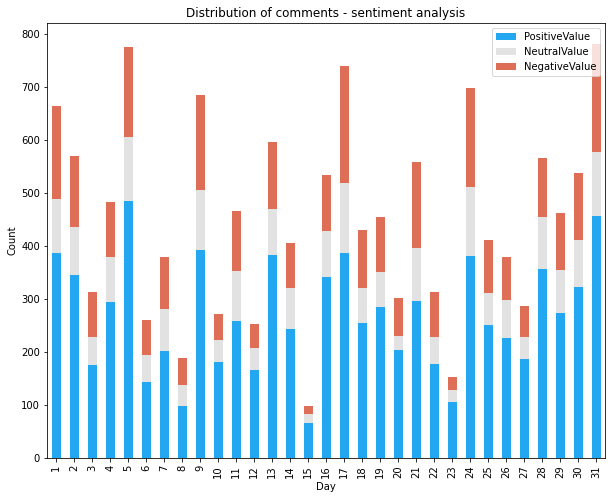

In [ ]:
ax = df.plot.bar(x='day', stacked=True, title='Distribution of comments - sentiment analysis', color =['#22a7f0', '#e2e2e2','#de6e56'],figsize=(10,8))
ax.set_ylabel('Count')
ax.set_xlabel('Day')